In [1]:
#Installing Keras
!pip install tensorflow --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 32.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [2]:
#Importing numpy, pandas
import numpy as np
import pandas as pd

In [ ]:
#Reading Dataset
df = pd.read_csv('/content/winequality-red.csv');

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Importing tensorflow
import tensorflow as tf

train_df=df.sample(frac=0.75, random_state=4)

val_df=df.drop(train_df.index)

In [ ]:
#Giving ranges
max_val=train_df.max(axis=0)
min_val=train_df.min(axis=0)

range=max_val - min_val
train_df=(train_df - min_val)/(range)

val_df=(val_df- min_val)/range

In [ ]:
#seperating targets and labels
X_train = train_df.drop('quality',axis=1)
X_val = val_df.drop('quality',axis=1)
y_train = train_df['quality']
y_val = val_df['quality']

input_shape = [X_train.shape[1]]

input_shape

[11]

In [ ]:
#Creating neural network
model=tf.keras.Sequential([tf.keras.layers.Dense(units=1,input_shape=input_shape)])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = tf.keras.Sequential([

	tf.keras.layers.Dense(units=64, activation='relu',
						input_shape=input_shape),
	tf.keras.layers.Dense(units=64, activation='relu'),
	tf.keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#adam optimizer
model.compile(optimizer='adam',  loss='mae')

In [ ]:
losses = model.fit(X_train, y_train,

				validation_data=(X_val, y_val),

				batch_size=256,
				epochs=25, # total epoch

				)


Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.3870 - val_loss: 0.1919
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1713 - val_loss: 0.1554
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1658 - val_loss: 0.1539
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1542 - val_loss: 0.1193
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1252 - val_loss: 0.1207
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1244 - val_loss: 0.1080
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1109 - val_loss: 0.1080
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1112 - val_loss: 0.1041
Epoch 9/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1089 - val_loss: 0.1067
Epoch 10/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1090 - val_loss: 0.1031
Epoch 11/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1066 - val_loss: 0.1015
Epoch 12/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1059 - val_loss: 0.1017
Epo

In [ ]:
model.predict(X_val.iloc[0:3, :])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


array([[0.41688386],
       [0.5011371 ],
       [0.40846002]], dtype=float32)

In [ ]:
y_val.iloc[0:3]

0     0.4
9     0.4
12    0.4
Name: quality, dtype: float64

<Axes: >

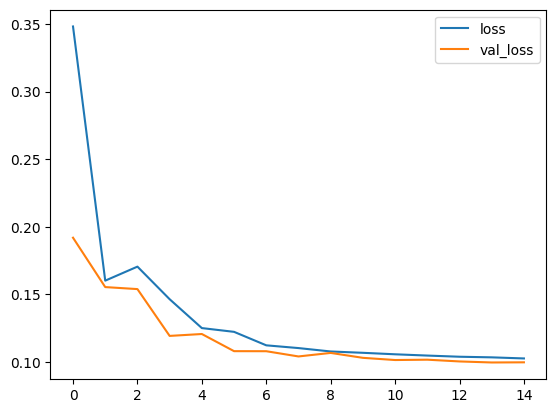

In [ ]:
loss_df = pd.DataFrame(losses.history)

loss_df.loc[:,['loss','val_loss']].plot()